In [269]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as  sns

In [270]:
df = pd.DataFrame()
     

In [271]:
df["X1"]=[1,2,4,3,5,6,7,8,9,9,8,9]
df["X2"]=[2,5,3,1,7,9,1,3,4,2,3,7]
df["label"]=[0,1,1,0,1,0,1,1,0,1,0,1]

df

,X1,X2,label
0,1,2,0
1,2,5,1
2,4,3,1
3,3,1,0
4,5,7,1
5,6,9,0
6,7,1,1
7,8,3,1
8,9,4,0
9,9,2,1


<Axes: xlabel='X1', ylabel='X2'>

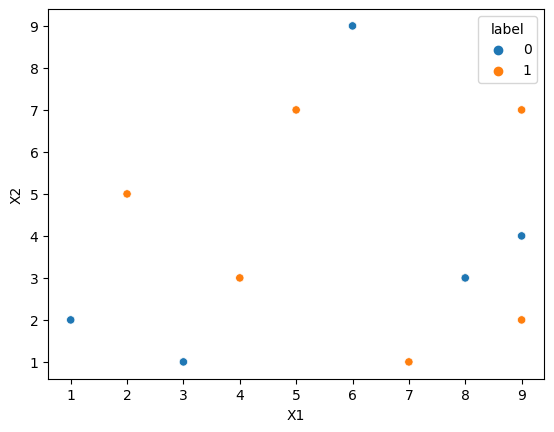

In [272]:
sns.scatterplot(data=df,x="X1",y="X2",hue=df["label"])

In [273]:
df["weight"]=1/len(df)

In [274]:
df

,X1,X2,label,weight
0,1,2,0,0.083333
1,2,5,1,0.083333
2,4,3,1,0.083333
3,3,1,0,0.083333
4,5,7,1,0.083333
5,6,9,0,0.083333
6,7,1,1,0.083333
7,8,3,1,0.083333
8,9,4,0,0.083333
9,9,2,1,0.083333


In [275]:
from sklearn.tree import DecisionTreeClassifier

In [276]:
dt1=DecisionTreeClassifier(max_depth=1)#stump
X=df.iloc[:,0:2].values
y=df["label"].values


In [277]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [278]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 1.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]')]

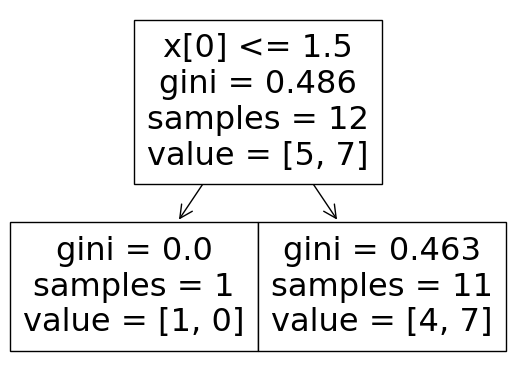

In [279]:
plot_tree(dt1)

<Axes: >

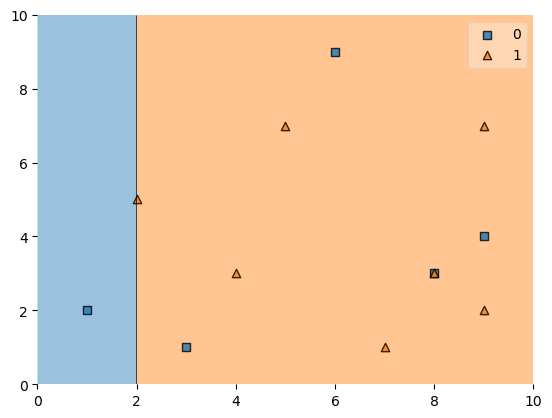

In [280]:
plot_decision_regions(X,y,clf=dt1)

In [281]:
df["y_pred"]=dt1.predict(X)

In [282]:
df

,X1,X2,label,weight,y_pred
0,1,2,0,0.083333,0
1,2,5,1,0.083333,1
2,4,3,1,0.083333,1
3,3,1,0,0.083333,1
4,5,7,1,0.083333,1
5,6,9,0,0.083333,1
6,7,1,1,0.083333,1
7,8,3,1,0.083333,1
8,9,4,0,0.083333,1
9,9,2,1,0.083333,1


In [283]:
def calculate_New_Weight(er):
    return 0.5*np.log((1-er)/(er))

In [285]:
error=len(df.loc[df["label"]!=df["y_pred"]])/len(df)# calculating the error rate 
alpha=calculate_New_Weight(error)
alpha

0.34657359027997275

In [286]:
def update_weight(row,alpha=0.3465):
    if row["label"]==row["y_pred"]:
        return row["weight"]*np.exp(-alpha)
    else:
        return row["weight"]*np.exp(alpha)
        

In [287]:
df["updated_weight"]=df.apply( update_weight,axis=1)

In [288]:
df

,X1,X2,label,weight,y_pred,updated_weight
0,1,2,0,0.083333,0,0.058930
1,2,5,1,0.083333,1,0.058930
2,4,3,1,0.083333,1,0.058930
3,3,1,0,0.083333,1,0.117842
4,5,7,1,0.083333,1,0.058930
5,6,9,0,0.083333,1,0.117842
6,7,1,1,0.083333,1,0.058930
7,8,3,1,0.083333,1,0.058930
8,9,4,0,0.083333,1,0.117842
9,9,2,1,0.083333,1,0.058930


In [289]:
df["updated_weight"].sum()

0.9428090441349684

In [290]:
df["normalized_weight"]=df["updated_weight"]/df["updated_weight"].sum()

In [291]:
df

,X1,X2,label,weight,y_pred,updated_weight,normalized_weight
0,1,2,0,0.083333,0,0.058930,0.062505
1,2,5,1,0.083333,1,0.058930,0.062505
2,4,3,1,0.083333,1,0.058930,0.062505
3,3,1,0,0.083333,1,0.117842,0.124991
4,5,7,1,0.083333,1,0.058930,0.062505
5,6,9,0,0.083333,1,0.117842,0.124991
6,7,1,1,0.083333,1,0.058930,0.062505
7,8,3,1,0.083333,1,0.058930,0.062505
8,9,4,0,0.083333,1,0.117842,0.124991
9,9,2,1,0.083333,1,0.058930,0.062505


In [292]:
df['normalized_weight'].sum()

1.0

In [293]:
df["cumulative_upper"]=np.cumsum(df["normalized_weight"])

In [294]:
df['cumulative_lower'] = df['cumulative_upper'] - df['normalized_weight']

In [295]:
df.drop(columns="normalized_weight", inplace=True)

In [296]:
df

,X1,X2,label,weight,y_pred,updated_weight,cumulative_upper,cumulative_lower
0,1,2,0,0.083333,0,0.058930,0.062505,0.000000
1,2,5,1,0.083333,1,0.058930,0.125009,0.062505
2,4,3,1,0.083333,1,0.058930,0.187514,0.125009
3,3,1,0,0.083333,1,0.117842,0.312505,0.187514
4,5,7,1,0.083333,1,0.058930,0.375009,0.312505
5,6,9,0,0.083333,1,0.117842,0.500000,0.375009
6,7,1,1,0.083333,1,0.058930,0.562505,0.500000
7,8,3,1,0.083333,1,0.058930,0.625009,0.562505
8,9,4,0,0.083333,1,0.117842,0.750000,0.625009
9,9,2,1,0.083333,1,0.058930,0.812505,0.750000


In [297]:
def new_dataset_selection(df):
    index1=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row["cumulative_lower"]<a and a < row["cumulative_upper"]:
                index1.append(index)
    return index1

In [298]:
index2=new_dataset_selection(df)
index2

[3, 10, 8, 1, 7, 8, 4, 6, 1, 6, 7, 9]

In [299]:
df1=df.iloc[index2,[0,1,2,3]]

In [300]:

df1

,X1,X2,label,weight
3,3,1,0,0.083333
10,8,3,0,0.083333
8,9,4,0,0.083333
1,2,5,1,0.083333
7,8,3,1,0.083333
8,9,4,0,0.083333
4,5,7,1,0.083333
6,7,1,1,0.083333
1,2,5,1,0.083333
6,7,1,1,0.083333


In [301]:
dt2=DecisionTreeClassifier(max_depth=1)

In [302]:
X=df1.iloc[:,0:2].values
y=df1.iloc[:,2].values

In [303]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.25, 0.25, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

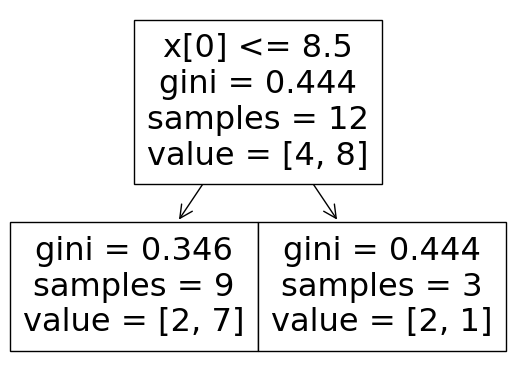

In [304]:
plot_tree(dt2)

<Axes: >

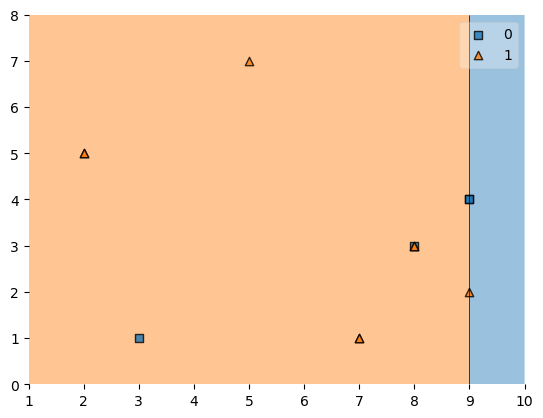

In [305]:
plot_decision_regions(X,y,clf=dt2)

In [306]:
df1['y_pred']=dt2.predict(X)

In [307]:
 df1

,X1,X2,label,weight,y_pred
3,3,1,0,0.083333,1
10,8,3,0,0.083333,1
8,9,4,0,0.083333,0
1,2,5,1,0.083333,1
7,8,3,1,0.083333,1
8,9,4,0,0.083333,0
4,5,7,1,0.083333,1
6,7,1,1,0.083333,1
1,2,5,1,0.083333,1
6,7,1,1,0.083333,1


In [308]:
error=len(df1.loc[df1["label"]!=df1["y_pred"]])/len(df1)# calculating the error rate 
print(error)
alpha1=calculate_New_Weight(error)
alpha1

0.25


0.5493061443340549

In [309]:
def update_weight1(row,alpha=0.54):
    if row["label"]==row["y_pred"]:
        return row["weight"]*np.exp(-alpha)
    else:
        return row["weight"]*np.exp(alpha)
        

In [310]:
df1['updated_weight'] = df1.apply(update_weight1,axis=1)

In [311]:
df1

,X1,X2,label,weight,y_pred,updated_weight
3,3,1,0,0.083333,1,0.143001
10,8,3,0,0.083333,1,0.143001
8,9,4,0,0.083333,0,0.048562
1,2,5,1,0.083333,1,0.048562
7,8,3,1,0.083333,1,0.048562
8,9,4,0,0.083333,0,0.048562
4,5,7,1,0.083333,1,0.048562
6,7,1,1,0.083333,1,0.048562
1,2,5,1,0.083333,1,0.048562
6,7,1,1,0.083333,1,0.048562


In [312]:
df1["normalized_weight"]=df1["updated_weight"]/df1["updated_weight"].sum()

In [313]:
df1

,X1,X2,label,weight,y_pred,updated_weight,normalized_weight
3,3,1,0,0.083333,1,0.143001,0.165116
10,8,3,0,0.083333,1,0.143001,0.165116
8,9,4,0,0.083333,0,0.048562,0.056073
1,2,5,1,0.083333,1,0.048562,0.056073
7,8,3,1,0.083333,1,0.048562,0.056073
8,9,4,0,0.083333,0,0.048562,0.056073
4,5,7,1,0.083333,1,0.048562,0.056073
6,7,1,1,0.083333,1,0.048562,0.056073
1,2,5,1,0.083333,1,0.048562,0.056073
6,7,1,1,0.083333,1,0.048562,0.056073


In [315]:
df1["cumulative_upper"]=np.cumsum(df1["normalized_weight"])

In [316]:
df1['cumulative_lower'] = df1['cumulative_upper'] - df1['normalized_weight']

In [317]:
df1

,X1,X2,label,weight,y_pred,updated_weight,normalized_weight,cumulative_upper,cumulative_lower
3,3,1,0,0.083333,1,0.143001,0.165116,0.165116,0.000000
10,8,3,0,0.083333,1,0.143001,0.165116,0.330231,0.165116
8,9,4,0,0.083333,0,0.048562,0.056073,0.386304,0.330231
1,2,5,1,0.083333,1,0.048562,0.056073,0.442376,0.386304
7,8,3,1,0.083333,1,0.048562,0.056073,0.498449,0.442376
8,9,4,0,0.083333,0,0.048562,0.056073,0.554522,0.498449
4,5,7,1,0.083333,1,0.048562,0.056073,0.610594,0.554522
6,7,1,1,0.083333,1,0.048562,0.056073,0.666667,0.610594
1,2,5,1,0.083333,1,0.048562,0.056073,0.722739,0.666667
6,7,1,1,0.083333,1,0.048562,0.056073,0.778812,0.722739


In [143]:
df1.drop(columns=["cumulatiive_upper","cumulative_lower"], inplace=True)

In [318]:
df1.drop(columns="normalized_weight", inplace=True)

In [319]:
df1

,X1,X2,label,weight,y_pred,updated_weight,cumulative_upper,cumulative_lower
3,3,1,0,0.083333,1,0.143001,0.165116,0.000000
10,8,3,0,0.083333,1,0.143001,0.330231,0.165116
8,9,4,0,0.083333,0,0.048562,0.386304,0.330231
1,2,5,1,0.083333,1,0.048562,0.442376,0.386304
7,8,3,1,0.083333,1,0.048562,0.498449,0.442376
8,9,4,0,0.083333,0,0.048562,0.554522,0.498449
4,5,7,1,0.083333,1,0.048562,0.610594,0.554522
6,7,1,1,0.083333,1,0.048562,0.666667,0.610594
1,2,5,1,0.083333,1,0.048562,0.722739,0.666667
6,7,1,1,0.083333,1,0.048562,0.778812,0.722739


In [320]:
index3=new_dataset_selection(df1)
index3

[6, 3, 3, 6, 4, 7, 6, 9, 1, 4, 8, 7]

In [321]:
df2=df1.iloc[index3,[0,1,2,3]]

In [322]:
df2

,X1,X2,label,weight
4,5,7,1,0.083333
1,2,5,1,0.083333
1,2,5,1,0.083333
4,5,7,1,0.083333
7,8,3,1,0.083333
6,7,1,1,0.083333
4,5,7,1,0.083333
6,7,1,1,0.083333
10,8,3,0,0.083333
7,8,3,1,0.083333


In [323]:
dt3=DecisionTreeClassifier(max_depth=1)

In [324]:
X=df2.iloc[:,0:2].values
y=df2.iloc[:,2].values

In [325]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [326]:
df2["y_pred"]=dt3.predict(X)

[Text(0.5, 0.75, 'x[0] <= 8.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.25, 0.25, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

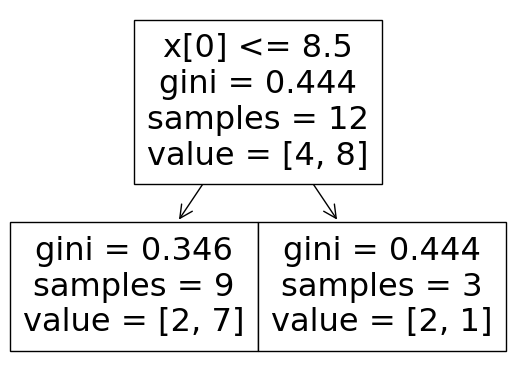

In [327]:
plot_tree(dt2)

<Axes: >

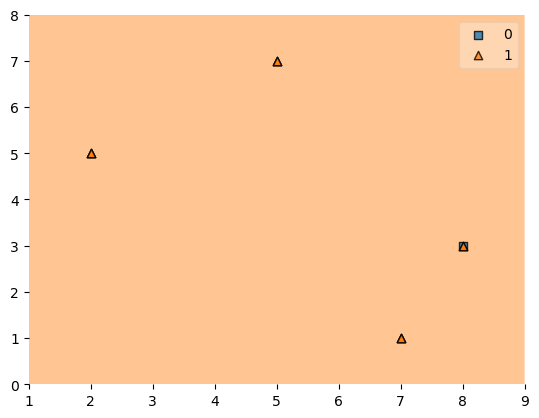

In [328]:
plot_decision_regions(X,y,clf=dt3)

In [329]:
df2

,X1,X2,label,weight,y_pred
4,5,7,1,0.083333,1
1,2,5,1,0.083333,1
1,2,5,1,0.083333,1
4,5,7,1,0.083333,1
7,8,3,1,0.083333,1
6,7,1,1,0.083333,1
4,5,7,1,0.083333,1
6,7,1,1,0.083333,1
10,8,3,0,0.083333,1
7,8,3,1,0.083333,1


In [331]:
error=len(df2.loc[df2["label"]!=df2["y_pred"]])/len(df2)# calculating the error rate 
print(error)
alpha2=calculate_New_Weight(error)
alpha2

0.08333333333333333


1.1989476363991853

In [332]:
print(alpha,alpha1,alpha2)

0.34657359027997275 0.5493061443340549 1.1989476363991853


### Prediction

In [333]:
test=np.array([8,3]).reshape(1,2)
dt1.predict(test)

array([1], dtype=int64)

In [334]:
dt2.predict(test)

array([1], dtype=int64)

In [335]:
dt3.predict(test)

array([1], dtype=int64)

In [336]:
alpha*1 + alpha1*(1) + alpha2*(1)

2.094827371013213

In [337]:
np.sign(2.55297)

1.0